# Assignment Code: DA-AG-003
# Practical Python – Error Handling, Logging, and Data Manipulation| Assignment


In [1]:
# Question 3: Write a Python program that logs an error message to a log file when a division by zero exception occurs.
"This program uses the built-in logging module to set up logging to a file and catches a ZeroDivisionError"

import logging
import os

# Define the log file name
LOG_FILE = 'division_error.log'

# Configuration: Set up the logger
# 'a' mode appends to the file if it exists
logging.basicConfig(
    filename=LOG_FILE,
    level=logging.ERROR,  # Only log messages of severity ERROR and above
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def safe_division(numerator, denominator):
    """
    Performs division and logs an error if ZeroDivisionError occurs.
    """
    try:
        result = numerator / denominator
        print(f"The result of {numerator} / {denominator} is: {result}")
        return result
    except ZeroDivisionError as e:
        # Log the error message to the configured file
        error_message = f"Attempted division by zero: {numerator} / {denominator}"
        logging.error(error_message, exc_info=True)  # exc_info=True logs the traceback
        print(f"Error encountered. Check '{LOG_FILE}' for details.")
        return None

# --- Example Usage ---
print(f"Log file: {os.path.abspath(LOG_FILE)}\n")

# 1. Successful division
safe_division(10, 2)

# 2. Division by zero (will log an error)
safe_division(5, 0)

# 3. Successful division
safe_division(20, 4)

ERROR:root:Attempted division by zero: 5 / 0
Traceback (most recent call last):
  File "/tmp/ipython-input-3160790216.py", line 23, in safe_division
    result = numerator / denominator
             ~~~~~~~~~~^~~~~~~~~~~~~
ZeroDivisionError: division by zero


Log file: /content/division_error.log

The result of 10 / 2 is: 5.0
Error encountered. Check 'division_error.log' for details.
The result of 20 / 4 is: 5.0


5.0

In [2]:
# Question 4: Write a Python program that reads from one file and writes its content to another file.
"This program demonstrates reading a source file's content and then writing that content into a destination file."

# Define file names
SOURCE_FILE = 'source.txt'
DESTINATION_FILE = 'destination.txt'
CONTENT = "This is the content that will be read from the source file.\nIt includes a second line."

# --- Step 1: Create a source file with some content (Setup) ---
try:
    with open(SOURCE_FILE, 'w') as f:
        f.write(CONTENT)
    print(f"Created '{SOURCE_FILE}' with content.\n")
except IOError as e:
    print(f"Error creating source file: {e}")
    exit()

# --- Step 2: Read content from the source file and write it to the destination file ---
try:
    # 1. Read from the source file
    with open(SOURCE_FILE, 'r') as source:
        data = source.read()

    # 2. Write to the destination file
    with open(DESTINATION_FILE, 'w') as destination:
        destination.write(data)

    print(f"Successfully read from '{SOURCE_FILE}' and wrote to '{DESTINATION_FILE}'.")

    # 3. Verification (optional)
    with open(DESTINATION_FILE, 'r') as dest_check:
        content_written = dest_check.read()
    print(f"\nContent written to '{DESTINATION_FILE}' (Verification):")
    print("---")
    print(content_written.strip())
    print("---")

except FileNotFoundError:
    print("Error: Source file not found.")
except IOError as e:
    print(f"An I/O error occurred: {e}")

Created 'source.txt' with content.

Successfully read from 'source.txt' and wrote to 'destination.txt'.

Content written to 'destination.txt' (Verification):
---
This is the content that will be read from the source file.
It includes a second line.
---


In [3]:
# Question 5: Write a program that handles both IndexError and KeyError using a try-except block.
"This program attempts to access an item from a list using an invalid index (IndexError) and an item from a dictionary using an invalid key (KeyError), handling both exceptions in a single except block."

def handle_index_and_key_errors(data_list, data_dict, list_index, dict_key):
    """
    Attempts to access a list item and a dictionary item, handling
    IndexError and KeyError.
    """
    try:
        print(f"Attempting to access list item at index {list_index}...")
        # This line is expected to raise an IndexError
        list_value = data_list[list_index]
        print(f"List item: {list_value}") # This line won't execute if IndexError occurs

        print(f"\nAttempting to access dictionary item with key '{dict_key}'...")
        # This line is expected to raise a KeyError
        dict_value = data_dict[dict_key]
        print(f"Dictionary item: {dict_value}") # This line won't execute if KeyError occurs

    except (IndexError, KeyError) as e:
        # This block catches either IndexError or KeyError
        print("\n--- Exception Handled ---")
        print(f"An exception occurred: {type(e).__name__}")
        print(f"Error message: {e}")
        print("---")
    else:
        # This block executes if no exception occurs in the try block
        print("\nNo exceptions occurred.")
    finally:
        # This block always executes
        print("Execution attempt finished.")

# Data setup
my_list = [10, 20, 30]
my_dict = {'a': 1, 'b': 2, 'c': 3}

# --- Example 1: Triggering IndexError ---
print("--- Example 1: Triggering IndexError ---")
# List has size 3, index 5 is out of bounds (IndexError)
handle_index_and_key_errors(my_list, my_dict, 5, 'a')

# --- Example 2: Triggering KeyError (if list index was valid) ---
# Note: Because the IndexError occurs first in Example 1, the program stops
# and jumps to the except block. To demonstrate KeyError handling,
# let's modify the call to prevent IndexError.

print("\n--- Example 2: Triggering KeyError ---")
# List index is valid (no IndexError), but dictionary key 'd' is missing (KeyError)
handle_index_and_key_errors(my_list, my_dict, 1, 'd')

# --- Example 3: No Error ---
print("\n--- Example 3: No Error ---")
# Both index and key are valid
handle_index_and_key_errors(my_list, my_dict, 0, 'c')

--- Example 1: Triggering IndexError ---
Attempting to access list item at index 5...

--- Exception Handled ---
An exception occurred: IndexError
Error message: list index out of range
---
Execution attempt finished.

--- Example 2: Triggering KeyError ---
Attempting to access list item at index 1...
List item: 20

Attempting to access dictionary item with key 'd'...

--- Exception Handled ---
An exception occurred: KeyError
Error message: 'd'
---
Execution attempt finished.

--- Example 3: No Error ---
Attempting to access list item at index 0...
List item: 10

Attempting to access dictionary item with key 'c'...
Dictionary item: 3

No exceptions occurred.
Execution attempt finished.


7. Explain the difference between apply() and map() in Pandas.
- The $\text{apply()}$ and $\text{map()}$ methods in Pandas are essential tools for data manipulation, but they are not interchangeable. They are distinguished by their operational scope, the type of input they accept, and their respective performance characteristics. Understanding these distinctions is crucial for writing efficient and idiomatic data analysis code in Python.

A. Operational Scope and Applicability

The core difference between the two functions is the structure they are designed to transform.

i. $\text{map()}$

The $\text{map()}$ method is exclusive to the Pandas Series—meaning it can only be called on a single column (or a standalone Series object). It is fundamentally an element-wise operation designed for one-to-one transformation or substitution across every single value in that Series. It is focused on addressing the data content of a single vector.

ii. $\text{apply()}$

The $\text{apply()}$ method is far more versatile. It can be called on both a Series and a DataFrame. When called on a DataFrame, its power lies in the use of the axis parameter:

- $\text{axis}=0$ (Default): Applies the function to each column (Series) independently.

- $\text{axis}=1$: Applies the function to each row (Series), enabling calculations that require simultaneous access to multiple columns within the same record.

B. Input and Context

The argument passed to the user-defined function is the primary distinction regarding context.

i. $\text{map()}$ Input

When using a function with $\text{map()}$, the function receives only the individual scalar value of the element being processed as its input. For example, if processing a column of ages, the function receives one number at a time (e.g., $25$, then $30$, then $45$). This limits $\text{map()}$ to simple, self-contained transformations that don't depend on surrounding data or other columns.

Crucially, $\text{map()}$ is also the only one of the two methods that can accept a Python dictionary or a Pandas Series as input. When provided, $\text{map()}$ performs a direct, optimized lookup for value substitution. For instance, to recode a column where $\text{'M'}$ becomes $\text{'Male'}$ and $\text{'F'}$ becomes $\text{'Female'}$, a dictionary should be used with $\text{map()}$.

ii. $\text{apply()}$ Input

When $\text{apply()}$ is used on a DataFrame, the input passed to the function is an entire Series object—either a full column or a full row, depending on the $\text{axis}$ setting.

- Row Context: When $\text{axis}=1$, the function receives a Series where the index labels are the column names ($\text{'Weight'}$, $\text{'Height'}$). This allows the function to perform multi-column calculations, such as computing the Body Mass Index (BMI) by referencing both the $\text{row['Weight']}$ and $\text{row['Height']}$ values simultaneously.

- Method Availability: Because the function receives a Series, it can leverage all the built-in Series methods within the custom logic, such as $\text{.mean()}$ or $\text{.quantile()}$.

C. Performance Implications

Performance is the most practical differentiator, often dictated by whether the operation can be vectorized.

- The Vectorization Principle

For maximum speed, Pandas and NumPy rely on vectorized operations (e.g., $\text{df['A'] + 1}$), which execute pre-compiled C code in the background, bypassing the Python interpreter overhead. This should always be the first choice.

i. $\text{map()}$ Performance

Substitution: When $\text{map()}$ is used with a dictionary or Series, it is extremely fast because the lookup is implemented in highly optimized C code. It is the preferred method for simple value replacement.

Function Application: When $\text{map()}$ uses a function, its speed is limited by the Python interpreter loop, though it often performs slightly better than $\text{apply()}$ on a Series for simple element-wise transformations.

ii. $\text{apply()}$ Performance

Python Overhead: When $\text{apply()}$ is used with a function (especially $\text{axis}=1$), it generally exhibits the worst performance among the three options (vectorization, $\text{map()}$ with dict, $\text{apply()}$). This is because it involves iterating through the rows and repeatedly calling a generic Python function, incurring significant interpreter overhead for each record.

Necessity Over Speed: Despite the speed penalty, $\text{apply()}$ becomes the necessary and standard tool when the complexity of the operation requires context from multiple columns or involves custom logic that cannot be simplified into a vectorized expression.


In summary, $\text{map()}$ is a specialized, Series-only method that excels at fast, element-wise substitution using dictionaries. It is primarily concerned with what a value is. Conversely, $\text{apply()}$ is a general-purpose, flexible method that works on both DataFrames and Series. Its key strength is the ability to provide an entire row or column as context to a function, making it essential for how values relate across a dataset, despite its performance overhead on row-wise operations.

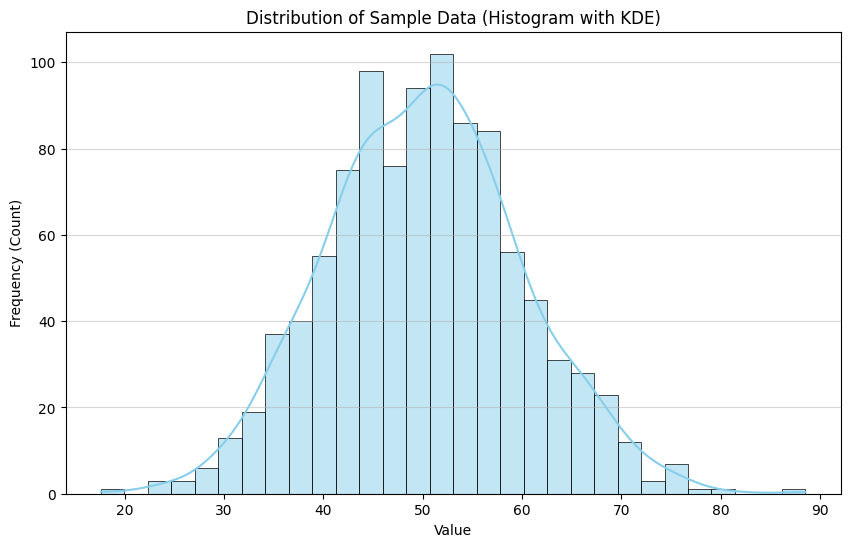

In [5]:
# Question 8: Create a histogram using Seaborn to visualize a distribution.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate sample data (e.g., a normal distribution)
np.random.seed(42) # for reproducibility
# Creating a Series of 1000 random data points with mean 50 and std dev 10
data = pd.Series(np.random.normal(loc=50, scale=10, size=1000))

# 2. Create the histogram using Seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,          # The data to plot
    bins=30,            # Number of bins to use
    kde=True,           # Add a Kernel Density Estimate line
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

# 3. Add titles and labels for clarity
plt.title('Distribution of Sample Data (Histogram with KDE)')
plt.xlabel('Value')
plt.ylabel('Frequency (Count)')
plt.grid(axis='y', alpha=0.5)

# 4. Display the plot
plt.show()

# ```




In [8]:
# Question 9: Use Pandas to load a CSV file and display its first 5 rows.

"This program first creates a dummy CSV file to ensure the script is runnable, then uses the Pandas function `pd.read_csv()` to load it and the `.head()` method to display the first five rows[cite: 34]."

import pandas as pd
import io

# --- Step 1: Create a dummy CSV file content (for demonstration) ---
csv_data = """Name,Age,City,Salary
Alice,30,New York,70000
Bob,25,Los Angeles,65000
Charlie,35,Chicago,80000
David,40,Houston,90000
Eve,28,Phoenix,60000
Frank,32,Philadelphia,75000
Grace,45,San Antonio,95000
"""
file_name = 'sample_data.csv'

# Write the string content to a local file
try:
    with open(file_name, 'w') as f:
        f.write(csv_data)
except IOError as e:
    print(f"Error creating dummy CSV file: {e}")
    exit()

# --- Step 2: Load the CSV file into a Pandas DataFrame ---
try:
    # Use pd.read_csv() to load the data
    df = pd.read_csv(file_name)

    print(f"Successfully loaded '{file_name}' into a DataFrame.")
    print("\n--- First 5 Rows of the DataFrame (.head()) ---")

    # Use .head(5) to display the first 5 rows
    first_five_rows = df.head(5)
    print(first_five_rows)
    print("-------------------------------------------------")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred during file loading: {e}")

Successfully loaded 'sample_data.csv' into a DataFrame.

--- First 5 Rows of the DataFrame (.head()) ---
      Name  Age         City  Salary
0    Alice   30     New York   70000
1      Bob   25  Los Angeles   65000
2  Charlie   35      Chicago   80000
3    David   40      Houston   90000
4      Eve   28      Phoenix   60000
-------------------------------------------------


--- Calculated Correlation Matrix ---
          A         B         C         D
A  1.000000 -0.149823 -0.028591  0.986153
B -0.149823  1.000000  0.090170 -0.151669
C -0.028591  0.090170  1.000000 -0.044549
D  0.986153 -0.151669 -0.044549  1.000000
-----------------------------------


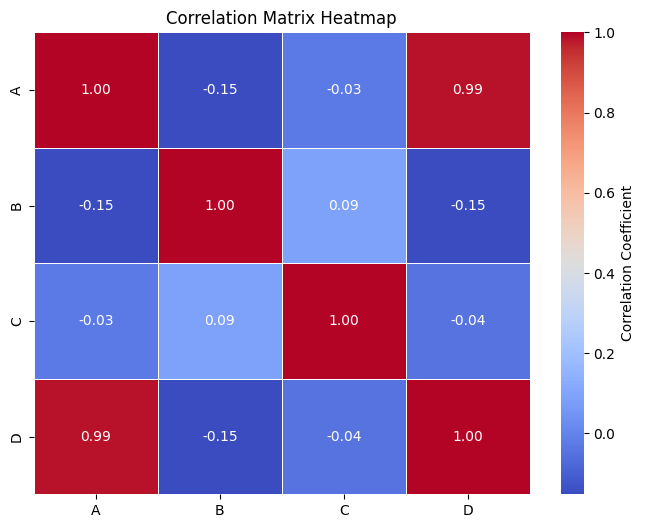

In [9]:
# Question 10: Calculate the correlation matrix using Seaborn and visualize it with a heatmap.
"This program uses Pandas to create a DataFrame, calculates the correlation matrix using the .corr() method, and then visualizes the matrix using the seaborn.heatmap function."

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a sample DataFrame with numerical data
np.random.seed(42)
data = {
    'A': np.random.rand(100),
    'B': np.random.randn(100) * 10,
    'C': np.random.rand(100) * 5 + 10,
    'D': np.random.rand(100) * 20
}
df = pd.DataFrame(data)

# Introduce a strong correlation between 'A' and 'D' for a visible pattern
df['D'] = df['A'] * 3 + np.random.rand(100) * 0.5

# 2. Calculate the correlation matrix
correlation_matrix = df.corr()
print("--- Calculated Correlation Matrix ---")
print(correlation_matrix)
print("-----------------------------------")

# 3. Visualize the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(8, 6))

# Use annot=True to display the correlation values on the heatmap
# Use cmap to define the color palette
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f", # Format annotations to 2 decimal places
    linewidths=.5, # Lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Add titles and adjust layout
plt.title('Correlation Matrix Heatmap')
plt.show()

# ```